# Séance 3 : Modèle de pricing 
## $\mathbb{E}(R_i)-r = \beta \cdot \left(\mathbb{E}(R_m)-r\right)$

In [2]:
import pandas as pd 

In [8]:
df = pd.read_csv("C:\\Users\\issak\\Documents\\M1\\Econométrie en Banque-Finance\\data(1)\\capm.txt", sep = ';')
df

,date,year,ford,sandp,ustb3m
0,2000-06-01,2000,13.186012,1454.599976,5.700
1,2000-07-01,2000,14.278451,1430.829956,6.020
2,2000-08-01,2000,13.104752,1517.680054,6.110
3,2000-09-01,2000,13.815863,1436.510010,6.030
4,2000-10-01,2000,14.154490,1429.400024,6.150
...,...,...,...,...,...
247,2021-01-01,2021,10.530000,3714.239990,0.048
248,2021-02-01,2021,11.700000,3811.149902,0.035
249,2021-03-01,2021,12.250000,3972.889893,0.013
250,2021-04-01,2021,11.540000,4181.169922,0.003


In [19]:
df.head()

,date,year,ford,sandp,ustb3m,rsandp,rford,ersandp,erd
0,2000-06-01,2000,13.186012,1454.599976,5.70,NaN,NaN,NaN,NaN
1,2000-07-01,2000,14.278451,1430.829956,6.02,-1.634128,8.284832,NaN,8.284832
2,2000-08-01,2000,13.104752,1517.680054,6.11,6.069911,-8.220072,-471.446540,-8.220072
3,2000-09-01,2000,13.815863,1436.510010,6.03,-5.348297,5.426360,-188.111636,5.426360
4,2000-10-01,2000,14.154490,1429.400024,6.15,-0.494949,2.451001,-90.745680,2.451001


In [31]:
df['rsandp']=(df['sandp']/df['sandp'].shift(1)-1)*100
df['erd']=(df['ford']/df['ford'].shift(1)-1)*100
df['ersandp']=(df['rsandp']/df['rsandp'].shift(1)-1)*100
df['erford']=(df['rford']/df['rford'].shift(1)-1)*100

In [20]:
df.describe()

,year,ford,sandp,ustb3m,rsandp,rford,ersandp,erd
count,252.000000,252.000000,252.000000,252.000000,251.000000,251.000000,250.000000,251.000000
mean,2010.416667,8.421564,1706.542101,1.437000,0.519013,0.899483,-1.119143,0.899483
std,6.087427,2.841822,750.987293,1.665868,4.341680,13.980257,2994.416310,13.980257
min,2000.000000,1.267625,735.090027,0.003000,-16.942452,-57.884619,-25303.014626,-57.884619
25%,2005.000000,6.370631,1159.459961,0.084500,-1.719986,-5.719272,-178.986570,-5.719272
50%,2010.000000,8.760482,1400.505005,0.927000,1.049138,-0.207908,-80.681750,-0.207908
75%,2016.000000,10.251287,2097.427490,2.078750,3.142016,5.385097,17.083660,5.385097
max,2021.000000,16.336540,4204.109863,6.150000,12.684404,127.376460,37760.920531,127.376460


<Axes: title={'center': 'Evolution des rendements des actions de Ford'}, xlabel='date'>

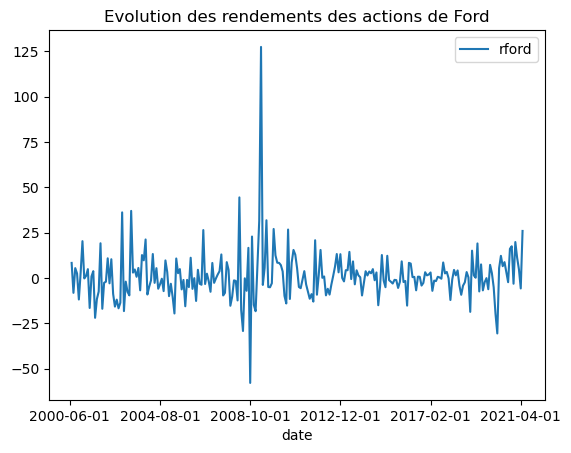

In [26]:
df.plot(x = "date", y = "rford", title = "Evolution des rendements des actions de Ford", legend = True)

<Axes: xlabel='rsandp', ylabel='rford'>

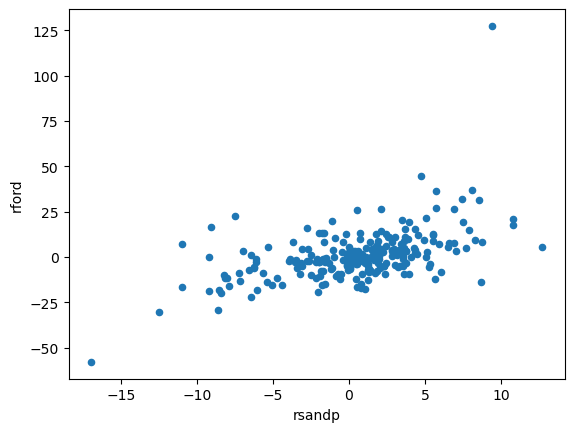

In [34]:
df.plot.scatter(x='rsandp',y="rford")

In [38]:
df[['rford','rsandp']].corr()

,rford,rsandp
rford,1.000000,0.513119
rsandp,0.513119,1.000000


In [40]:
import statsmodels.api as sm
